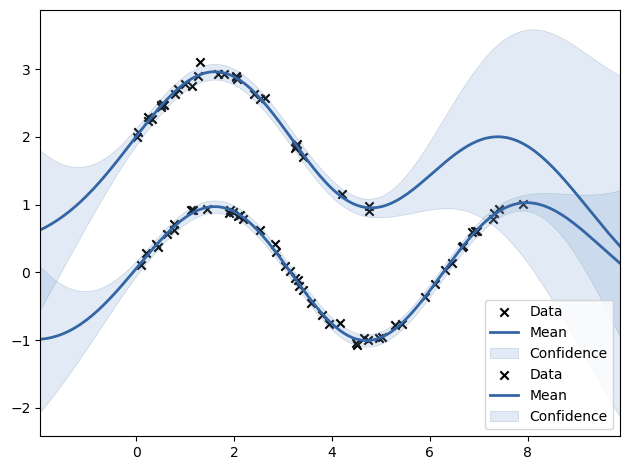

In [37]:
def coregionalization_toy(optimize=True, plot=True):
    """
    A simple demonstration of coregionalization on two sinusoidal functions.
    """
    # build a design matrix with a column of integers indicating the output
    X1 = np.random.rand(50, 1) * 8
    X2 = np.random.rand(30, 1) * 5

    # build a suitable set of observed variables
    Y1 = np.sin(X1) + np.random.randn(*X1.shape) * 0.05
    Y2 = np.sin(X2) + np.random.randn(*X2.shape) * 0.05 + 2.0

    m = GPy.models.GPCoregionalizedRegression(X_list=[X1, X2], Y_list=[Y1, Y2])

    if optimize:
        m.optimize("bfgs", max_iters=100)

    if MPL_AVAILABLE and plot:
        slices = GPy.util.multioutput.get_slices([X1, X2])
        m.plot(
            fixed_inputs=[(1, 0)],
            which_data_rows=slices[0],
            Y_metadata={"output_index": 0},
        )
        m.plot(
            fixed_inputs=[(1, 1)],
            which_data_rows=slices[1],
            Y_metadata={"output_index": 1},
            ax=plt.gca(),
        )
    return m

m = coregionalization_toy()

In [1]:
"""
Gaussian Processes regression examples
"""
MPL_AVAILABLE = True
try:
    import matplotlib.pyplot as plt
except ImportError:
    MPL_AVAILABLE = False

import numpy as np
import GPy


In [21]:
Y_metadata1 = {'output_index': np.array([[0]])}
xstar = np.random.rand(1, 1).reshape(1,-1)
xs = np.random.rand(1, 2).reshape(1,-1)
m.predict(xs, Y_metadata=Y_metadata1)

(array([[0.53790323]]), array([[0.00225104]]))

In [36]:
m.kern

coreg.,value,constraints,priors
rbf.variance,1.2297435102738905,+ve,
rbf.lengthscale,2.619992891909014,+ve,
B.W,"(2, 1)",,
B.kappa,"(2,)",+ve,


$R^{T}$

$\mathrm{d}$